# Problem Statement
Understand the factors on which the demand for these shared bikes depends. Specifically, factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Reading & Understanding The Data

# Reading & Understanding The Data

In [1]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# changing directory
os.chdir(r"C:\Users\sakshi mishra\Downloads\archive (4)")

In [5]:
# Read the data & check the head of the dataset
boom_bike = pd.read_csv("day.csv")
boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# shape of dataset
boom_bike.shape

(730, 16)

In [7]:
# checking the data type and number of null values in dataset
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Name of the columns present in the dataset
boom_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# Making the column name more undersatandable
boom_bike.rename(columns={"yr":"year","mnth": "month", "temp": "temperature", "hum": "humidity", "cnt": "count"}, inplace= True)
boom_bike.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
# Statistical summary of data
boom_bike.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Observation
We can observe that the categorical varibles are interpreted as numerical columns. Therfore, modification in the categorical data is required

In [12]:
# Modifying categorical data
boom_bike["season"] = boom_bike["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
boom_bike["month"] = boom_bike["month"].map({1:"jan", 2:"feb", 3: "mar", 4: "april", 5: "may", 6: "june", 7: "july", 8: "aug", 9: "sept", 10: "oct", 11: "nov", 12: "dec"})
boom_bike["weekday"] = boom_bike["weekday"].map({0:"sun", 1: "mon", 2:"tue", 3: "wed", 4: "thus", 5: "fri", 6:"sat"})
boom_bike["weathersit"] = boom_bike["weathersit"].map({1: "Clear", 2:"Mist + Cloudy", 3: "Light Snow", 4: "Heavy Rain"})

In [13]:
# Droping column 'instant' and 'dteday' (not required)
boom_bike.drop(["instant", "dteday"], 1, inplace= True)

# Visualization
Visualization of Numerical Variables

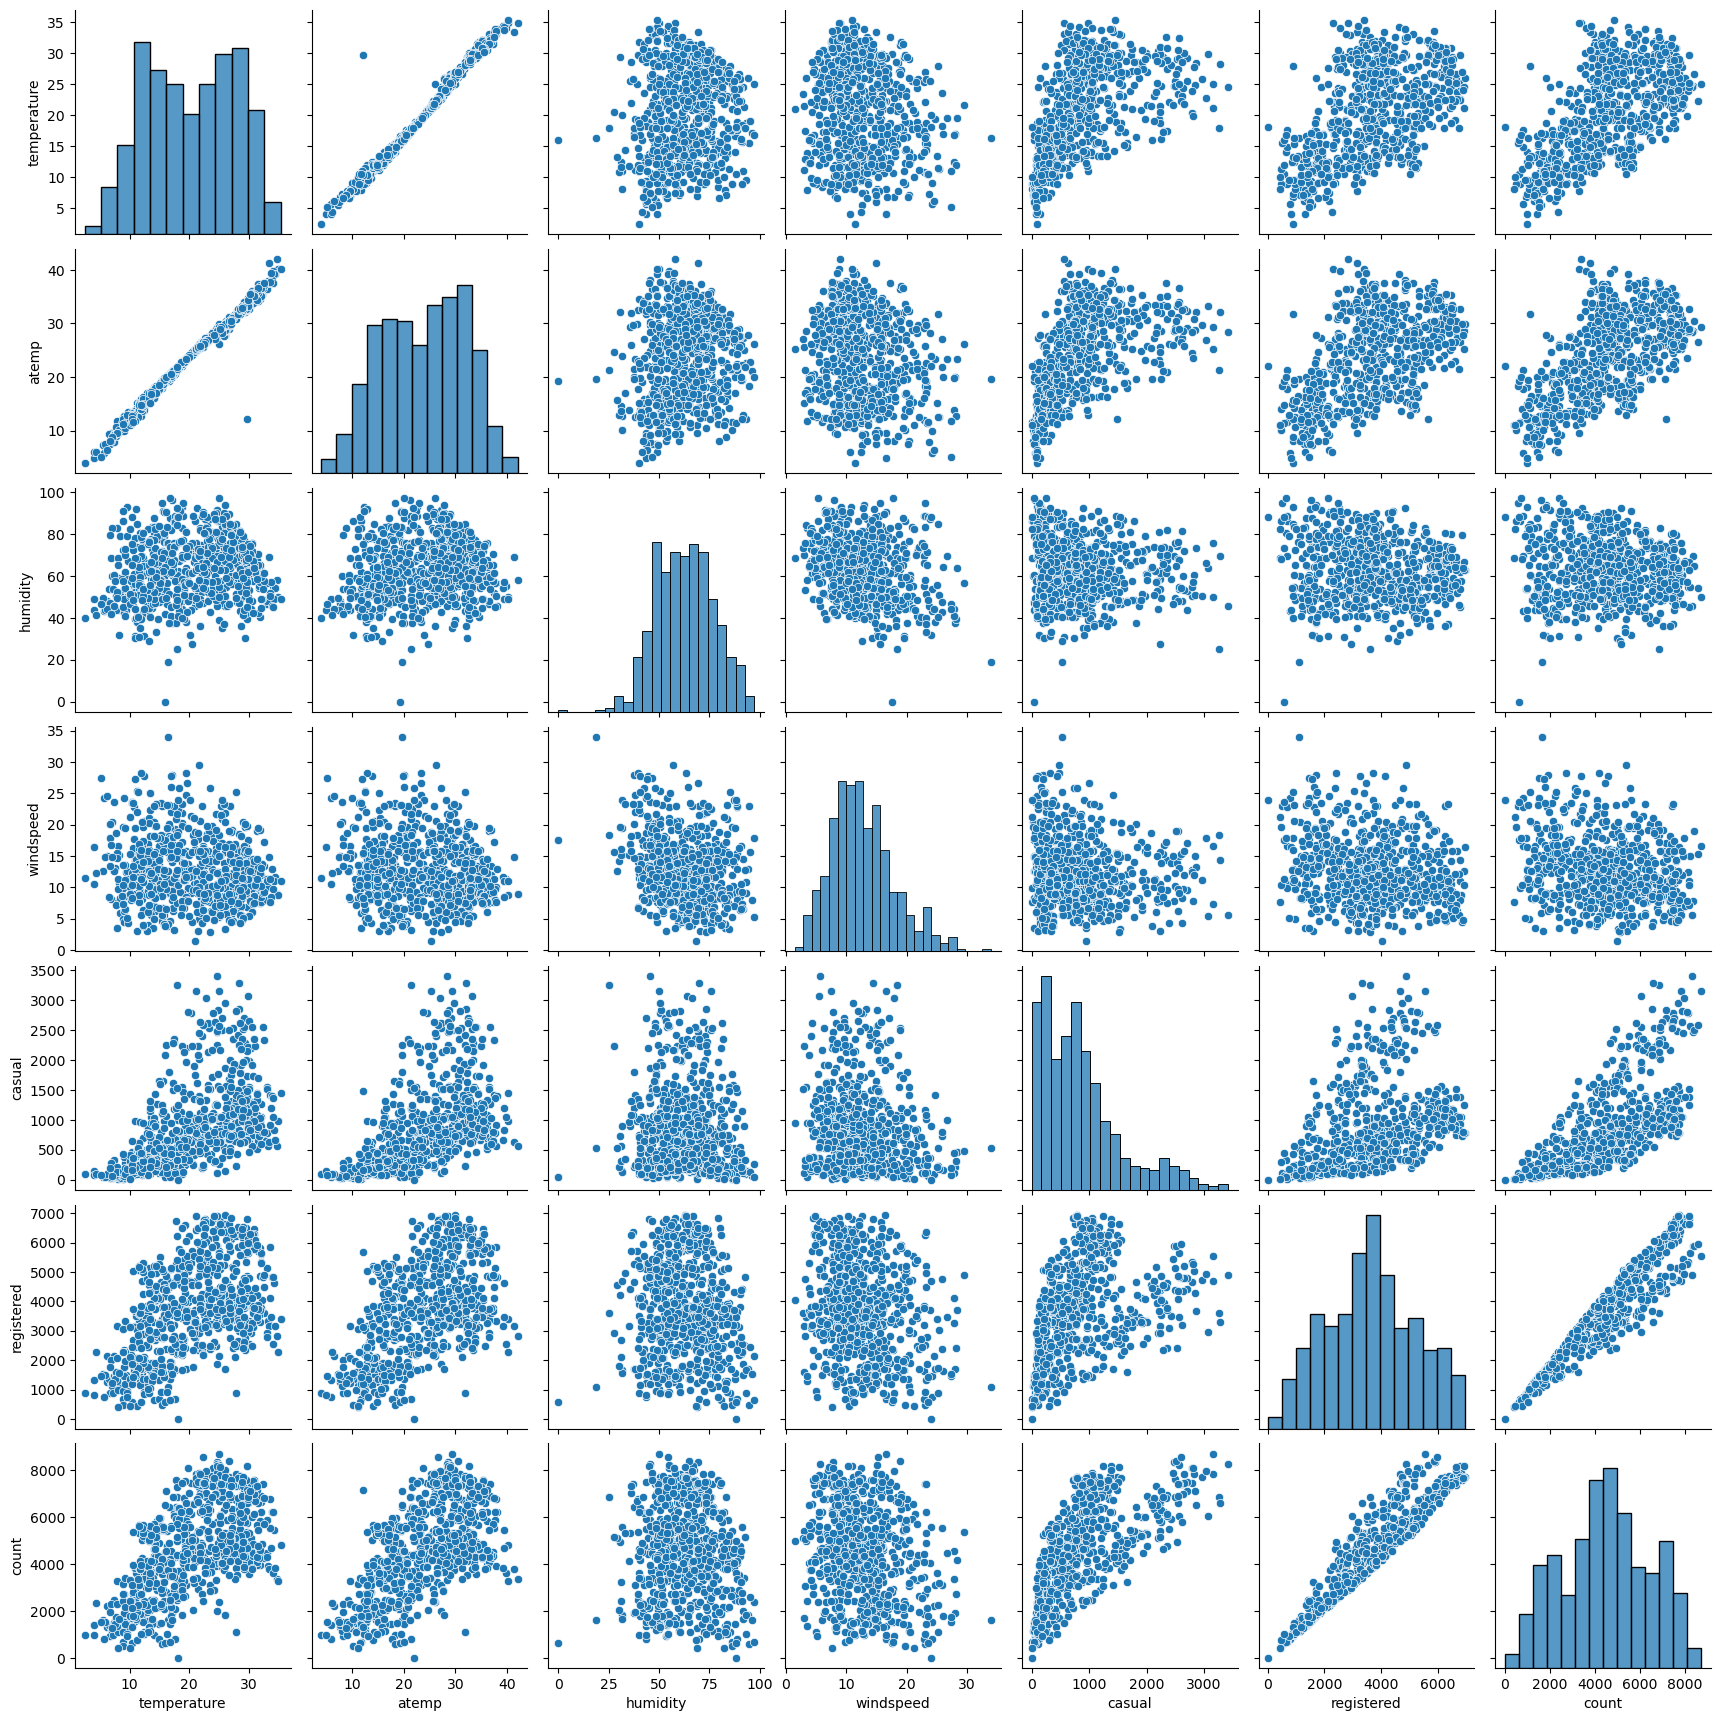

In [14]:
# Pairplot of all the numerical variables (to know the relation between them)
num_variable = ["temperature", "atemp", "humidity", "windspeed", "casual", "registered", "count"]
sns.pairplot(data = boom_bike, vars = num_variable)
plt.show()

Observations.
From above pair plot we can observe that atemp and temperature variable are highly correalted.
This is the case of multicollinearity therefore better to drop one of them.

In [15]:
# Drop atemp column to avoide multicollinearity
boom_bike.drop("atemp", 1, inplace= True)

In [16]:
# Dropping  casual and registered column since we can take only one variable as target variable
boom_bike.drop(["casual", "registered"], 1, inplace= True )

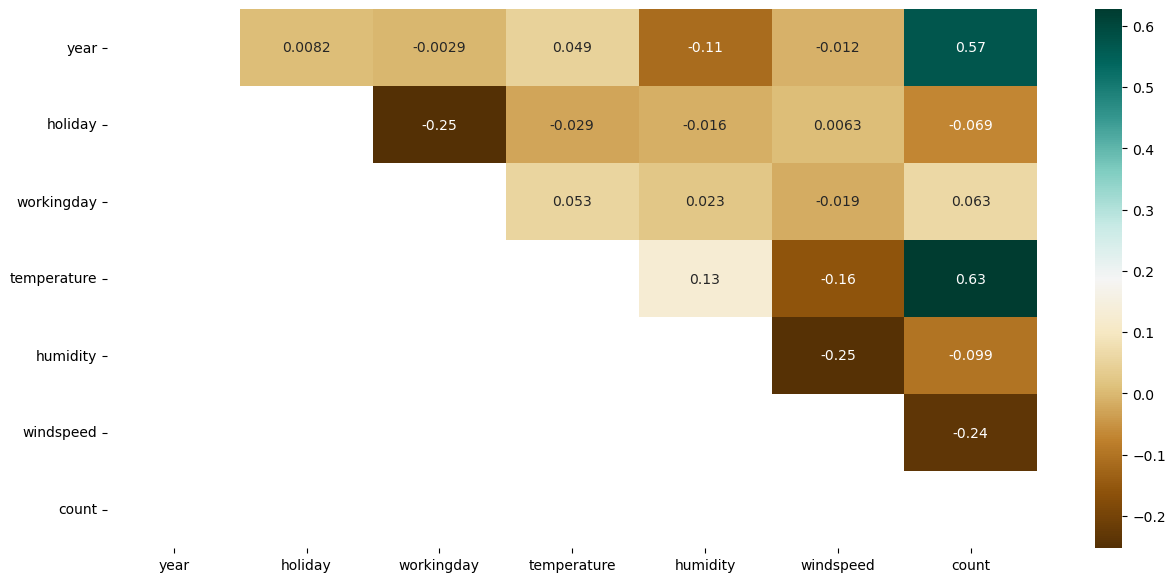

In [17]:
# Heatmap to observe correlation
mask = np.tril(np.ones_like(boom_bike.corr(), dtype= np.bool))
plt.figure(figsize =(15,7) )
sns.heatmap(data = boom_bike.corr(), annot= True, mask = mask, cmap = "BrBG" )
plt.show()

Observation
Target variable 'count' has good correlation with 'temperature'. Therefore we can say that 'temperature' could be the important variable in building the linear model.
Target variable 'count' has good correlation with 'year'. Therefore we can say that 'year' could be the important variable in building the linear model.

# Visualising Categorical Variables

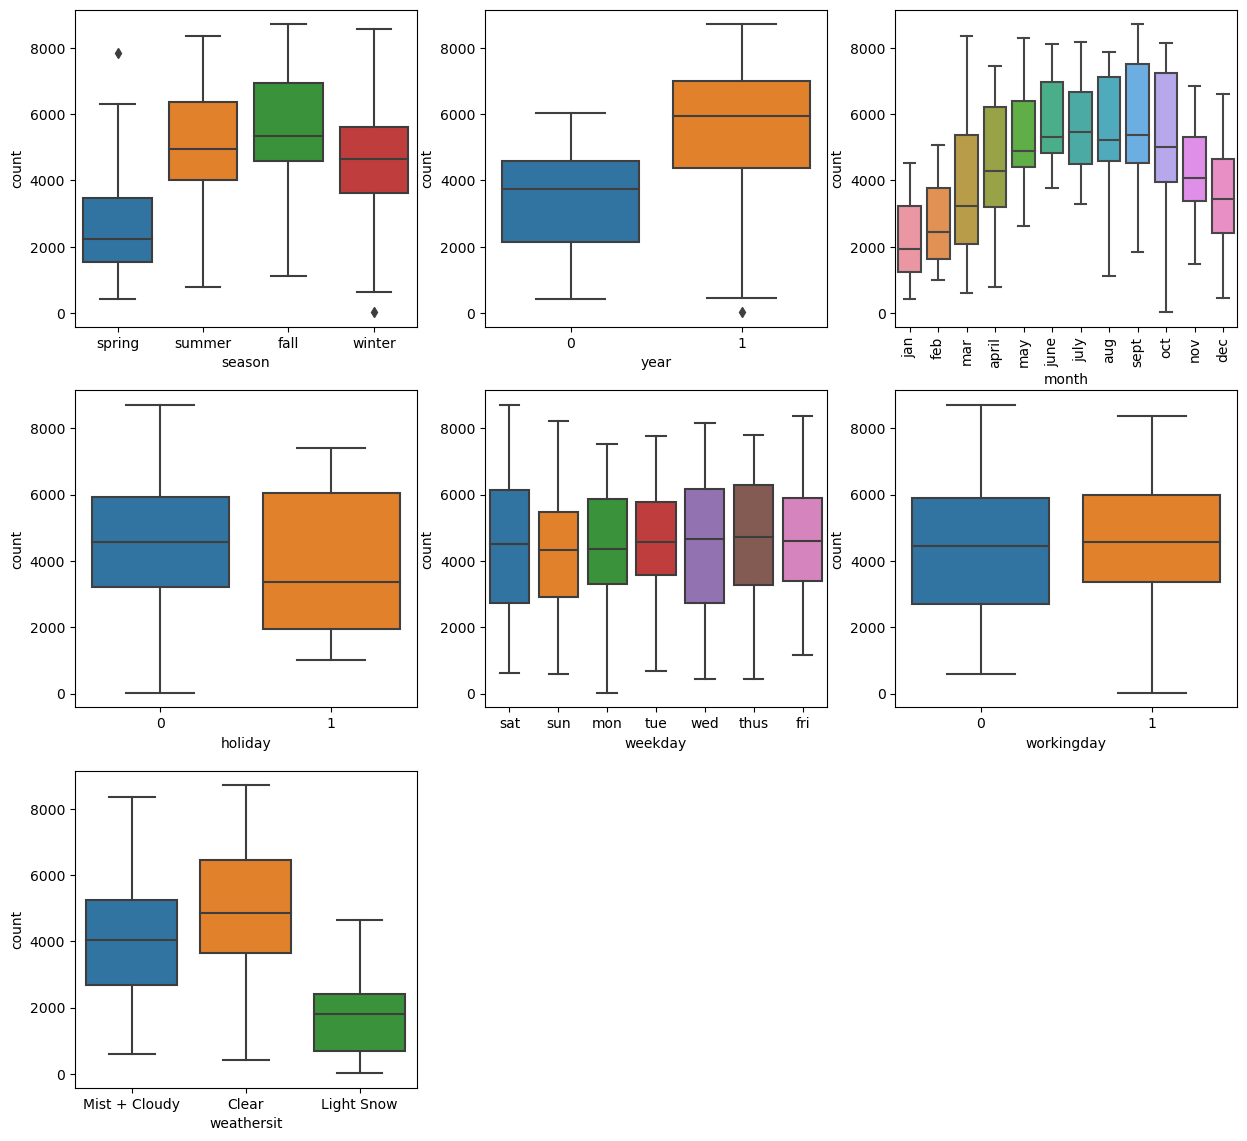

In [18]:
# Box plot between target variable 'count' and other categorical variables
cat_var = ["season", "year", "month", "holiday", "weekday", "workingday", "weathersit"]
plt.figure(figsize=(15,14))
plt.subplot(3,3,1)
sns.boxplot(x = "season", y = "count", data = boom_bike)

plt.subplot(3,3,2)
sns.boxplot(x = "year", y = "count", data = boom_bike)

plt.subplot(3,3,3)
sns.boxplot(x = "month", y = "count", data = boom_bike)
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.boxplot(x = "holiday", y = "count", data = boom_bike)

plt.subplot(3,3,5)
sns.boxplot(x = "weekday", y = "count", data = boom_bike)

plt.subplot(3,3,6)
sns.boxplot(x = "workingday", y = "count", data = boom_bike)

plt.subplot(3,3,7)
sns.boxplot(x = "weathersit", y = "count", data = boom_bike)

plt.show()

Observations
Maximum bike rented in fall season and then in summer.
Number of rented bikes increased in 2019 in comparison with 2018 data.
Bike were rented maximum in the month of july.
Bike rented during holidays are less.
Maximum bikes were rented when the weather is clear, and due to light snow rented bike counts goes down.

# Data Preparation

In [19]:
# Dummy variable for categorical features
season = pd.get_dummies(boom_bike.season ,drop_first= True)
month = pd.get_dummies(boom_bike.month, drop_first= True)
weekday = pd.get_dummies(boom_bike.weekday, drop_first= True)
weathersit = pd.get_dummies(boom_bike.weathersit, drop_first= True)

In [20]:
# Concatination of the dummy variable data
dummy_var = pd.concat([season, month, weekday, weathersit], axis= 1)

In [21]:
# Concatination of the fianl dummy data with the boom_bike data
boom_bike = pd.concat([boom_bike, dummy_var], axis = 1)
boom_bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
0,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Drop columns
boom_bike.drop(["season", "month", "weekday", "weathersit"],1, inplace = True)

In [23]:
# head of the dataset
boom_bike.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#Shape of the dataset
boom_bike.shape

(730, 29)

# Spliting data into Train and Test data

In [25]:
#Spliting train and test data
boom_bike_train, boom_bike_test = train_test_split(boom_bike, train_size = 0.7, random_state = 100)


In [26]:
#Printing the shape of train and test data
print("Train_dataset_shape:", boom_bike_train.shape)
print("Test_dataset_shape:",boom_bike_test.shape)

Train_dataset_shape: (510, 29)
Test_dataset_shape: (220, 29)


# Scaling the data

In [27]:
# MinMax Scaler
Scaler = MinMaxScaler()

In [28]:
# Scaling independent numerical variable in train dataset
num_var = ["temperature", "humidity", "windspeed", "count"]
boom_bike_train[num_var] = Scaler.fit_transform(boom_bike_train[num_var])

In [29]:
# Statistical summary of scaled train data
boom_bike_train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation
We can observe that scaling has been done perfectly as max value is 1 and min value is 0 for all the variables.

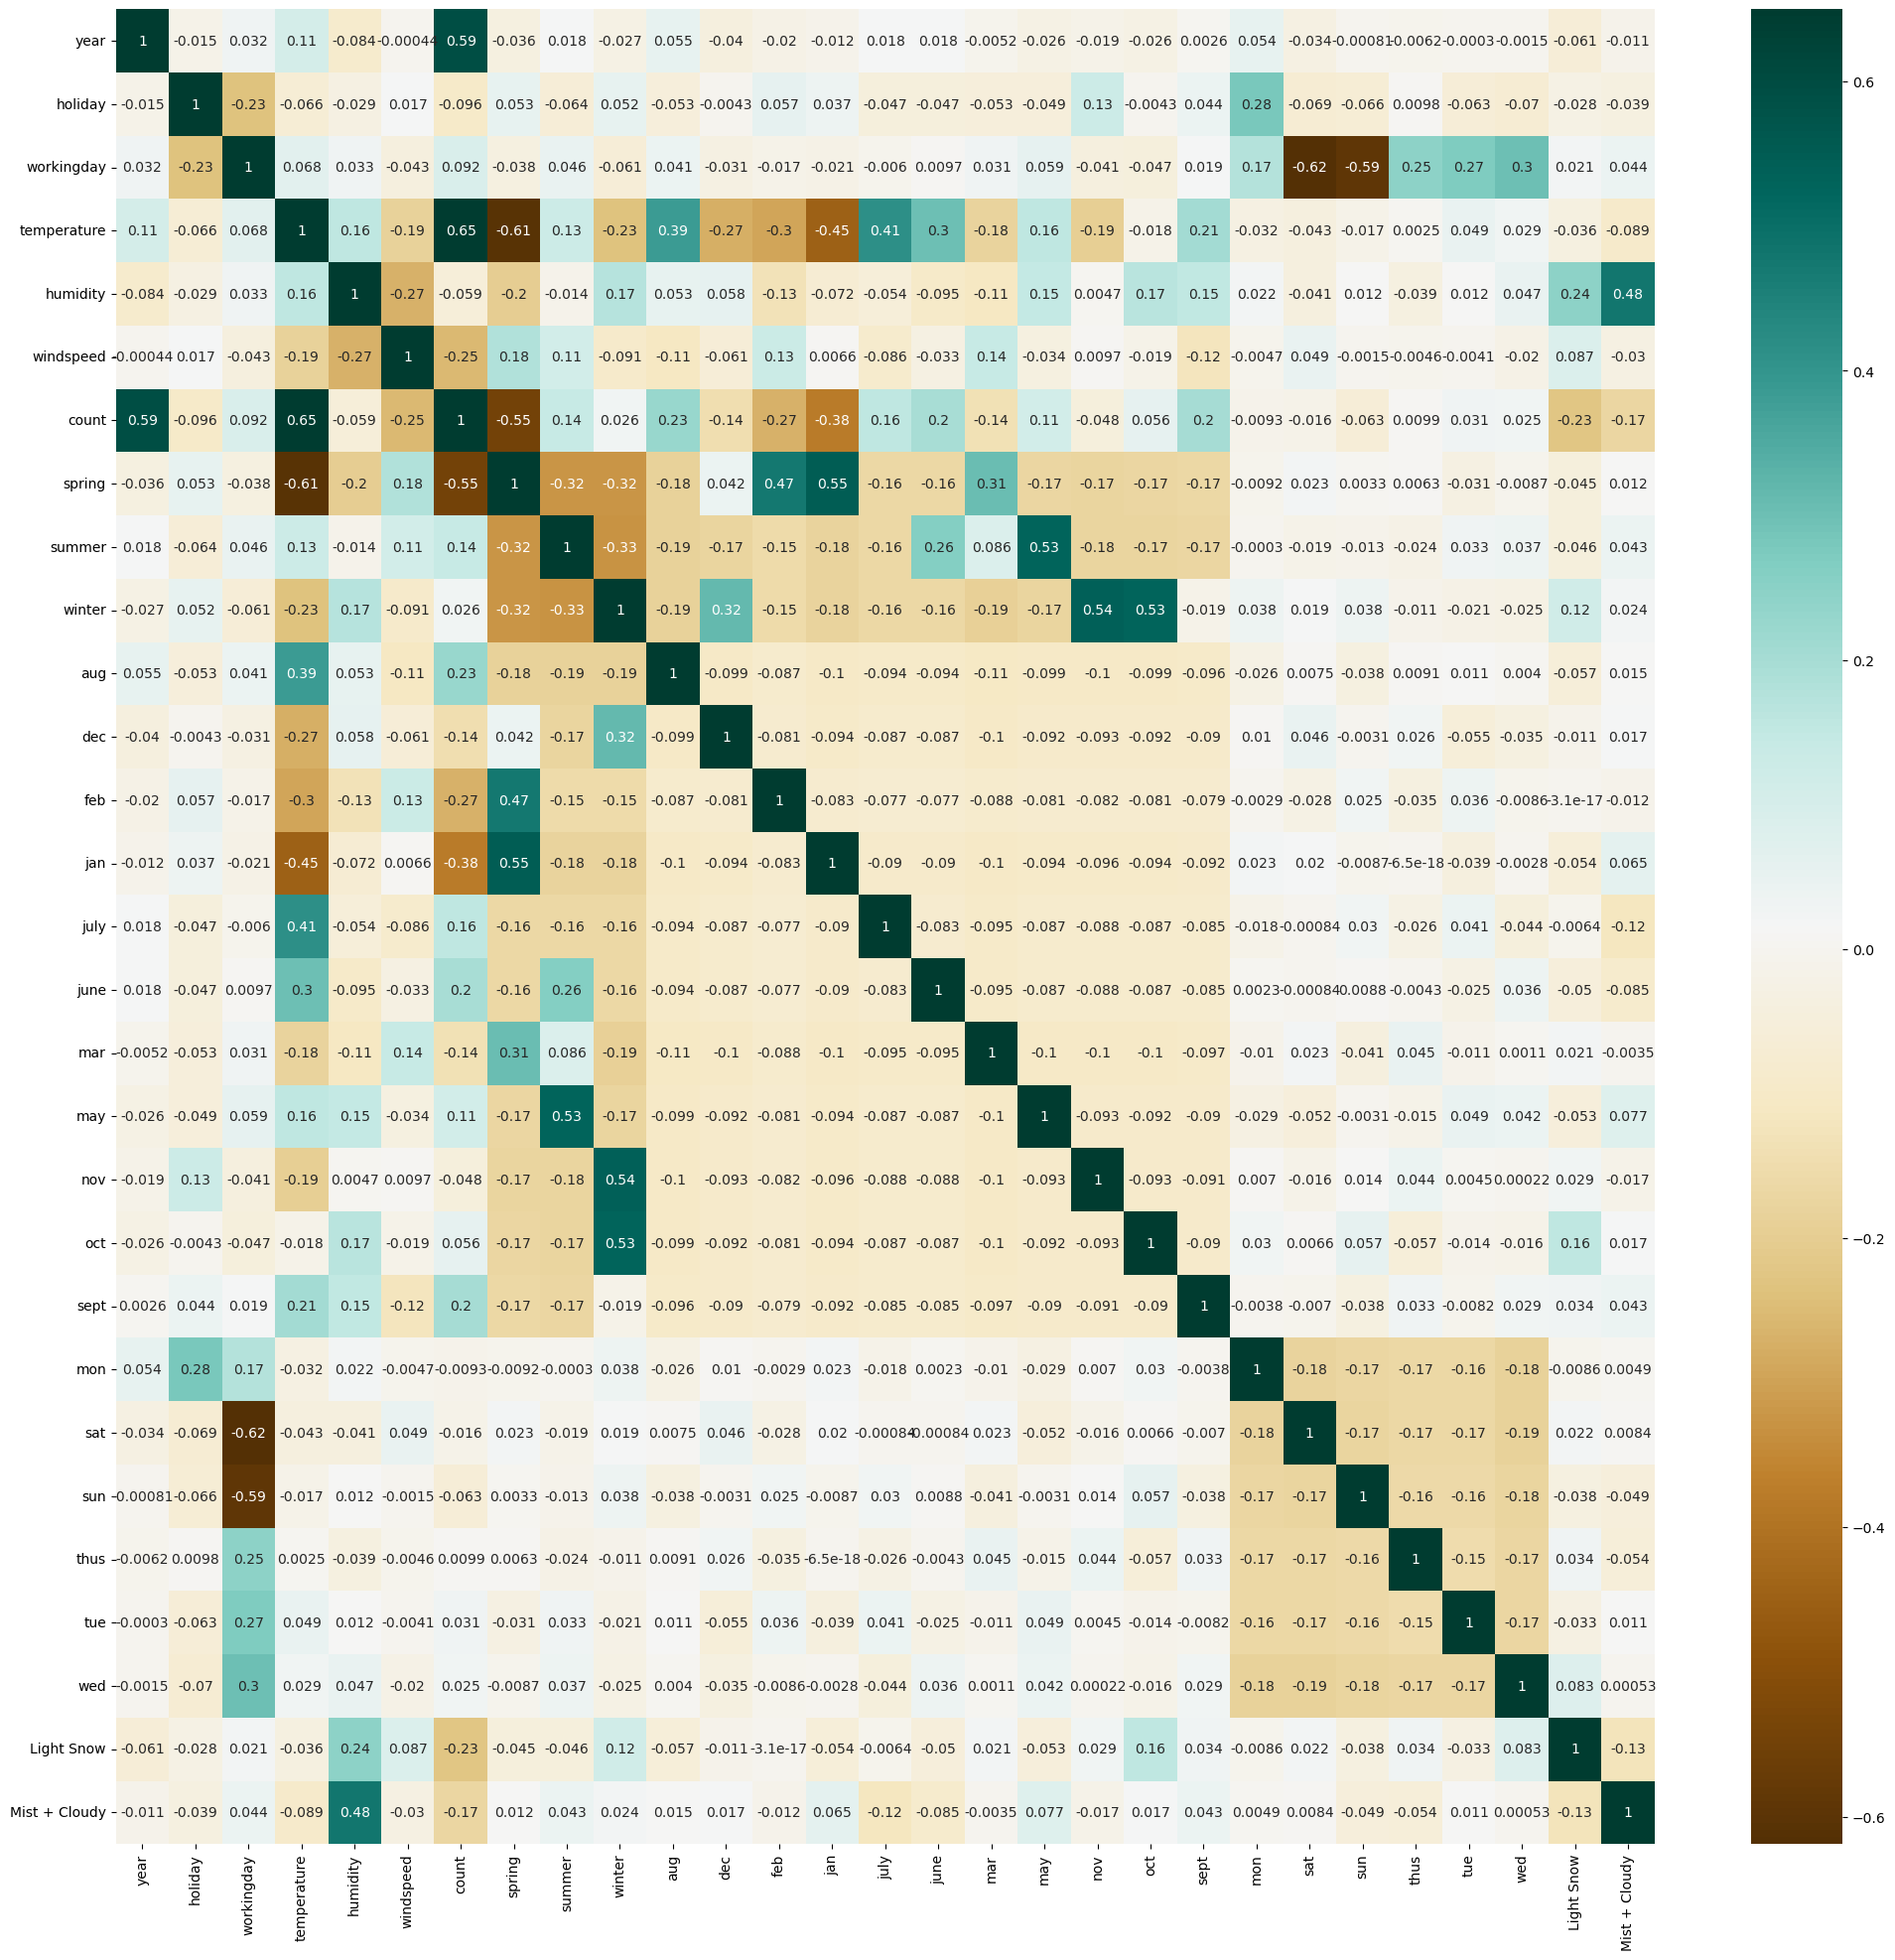

In [30]:
# check the correlation between variables
plt.figure(figsize =(25,24) )
sns.heatmap(data = boom_bike_train.corr(), annot= True, cmap = "BrBG", vmax = 0.65 )
plt.show()

Observation
There is a positive high correlation between target variable i.e count with feature variables 'temperature' and 'year'
There is a Negative high correlation between target variable i.e count with feature variables 'jan' and 'spring'
Further we can observe the correation between independent variables and consider this to avoid multicolinearity

# Model Building

In [31]:
# defining x and y
y_train = boom_bike_train.pop("count")
X_train = boom_bike_train

# Recursive Feature Elimination (RFE)

In [35]:
# elimination of variables using automated approach
# running RFE with the number of output 12 variables
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', False, 4),
 ('oct', False, 11),
 ('sept', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thus', False, 13),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [37]:
# list of 12 variables which are finalised by automated approch
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'spring', 'winter', 'july', 'sept', 'sat', 'sun', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [38]:
# creating dataset from RFE selected variables 
X_train_rfe = X_train[col]
X_train_rfe.head()

,year,holiday,workingday,temperature,humidity,windspeed,spring,winter,july,sept,sat,sun,Light Snow,Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1


# Building Model Using Statsmodels

In [39]:
# Building 1st model by manual selection
# Add constant
X_train_rfe_lr_1 = sm.add_constant(X_train_rfe)

In [40]:
#Build 1st model and fit the model
lr_1 = sm.OLS(y_train, X_train_rfe_lr_1)
lr_model_1 = lr_1.fit()

In [41]:
#Statistical summary of 1st linear model
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          9.38e-190
Time:                        22:39:10   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2435      0.025      9.653      0.000       0.194       0.293
year              0.2308      0.008     28.455      0.000       0.215       0.247
holiday          -0.0080      0.021     -0.374      0.709      -0.050       0.034
workingday        0.0948      0.009     10.227      0.000       0.077       0.113
temperature       0.4776      0.031     15.613      0.000       0.418       0.538
humidity         -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed        -0.1687      0.025     -6.616      0.000      -0.219      -0.119
spring           -0.1080      0.015     -7.280      0.000      -0.137      -0.079
winter            0.0558      0.012      4.528      0.000       0.032       0.080
july             -0.0782      0.017     -4.571      0.000      -0.112      -0.045
sept              0.0591      0.015      3.829      0.000       0.029       0.089
sat               0.1046      0.011      9.177      0.000       0.082       0.127
sun               0.0521      0.012      4.349      0.000       0.029       0.076
Light Snow       -0.2499      0.026     -9.482      0.000      -0.302      -0.198
Mist + Cloudy    -0.0578      0.011     -5.501      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     1.98e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
# Check VIF values of feature variables in 1st linear model
vif = pd.DataFrame()
vif["Feature"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif.sort_values(by = "VIF",ascending = False, inplace = True)
vif

,Feature,VIF
2,workingday,40.65
10,sat,9.92
11,sun,9.64
3,temperature,2.99
6,spring,2.55
1,holiday,2.54
4,humidity,1.89
7,winter,1.78
13,Mist + Cloudy,1.57
8,july,1.30


In [43]:
# Dropping varible with high VIF, drop "humidity"
X_train_rfe.drop("humidity", 1, inplace = True)

In [44]:
# Building 2nd linear model
# Add constant
X_train_rfe_lr_2 = sm.add_constant(X_train_rfe)

In [45]:
# Build 2nd model and fit the model
lr_2 = sm.OLS(y_train, X_train_rfe_lr_2)
lr_model_2 = lr_2.fit()

In [48]:
#Statistical summary of 2nd linear model
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.26e-187
Time:                        22:41:17   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1795      0.020      9.173      0.000       0.141       0.218
year              0.2344      0.008     28.661      0.000       0.218       0.250
holiday          -0.0241      0.021     -1.137      0.256      -0.066       0.018
workingday        0.0792      0.009      9.315      0.000       0.063       0.096
temperature       0.4493      0.030     14.895      0.000       0.390       0.509
windspeed        -0.1404      0.025     -5.657      0.000      -0.189      -0.092
spring           -0.1118      0.015     -7.441      0.000      -0.141      -0.082
winter            0.0468      0.012      3.808      0.000       0.023       0.071
july             -0.0711      0.017     -4.120      0.000      -0.105      -0.037
sept              0.0559      0.016      3.573      0.000       0.025       0.087
sat               0.0907      0.011      8.250      0.000       0.069       0.112
sun               0.0337      0.011      3.009      0.003       0.012       0.056
Light Snow       -0.2907      0.025    -11.824      0.000      -0.339      -0.242
Mist + Cloudy    -0.0816      0.009     -9.366      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.995
Skew:                          -0.644   Prob(JB):                     4.04e-36
Kurtosis:                       5.452   Cond. No.                     2.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
# Check VIF values of feature variables in 2nd linear model
vif_2= pd.DataFrame()
vif_2["Feature"] = X_train_rfe.columns
vif_2["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_2["VIF"] = round(vif_2["VIF"], 2)
vif_2.sort_values(by = "VIF",ascending = False, inplace = True)
vif_2

,Feature,VIF
2,workingday,23.29
9,sat,6.11
10,sun,5.69
3,temperature,2.83
5,spring,2.53
1,holiday,1.87
6,winter,1.71
7,july,1.28
8,sept,1.11
4,windspeed,1.08


In [49]:
# Dropping varible with high VIF, drop "windspeed".
X_train_rfe.drop("windspeed", 1, inplace = True)

In [50]:
# Building 3rd linear model
# Add constant
X_train_rfe_lr_3 = sm.add_constant(X_train_rfe)

In [51]:
# Build 3rd  model and fit the model
lr_3 = sm.OLS(y_train, X_train_rfe_lr_3)
lr_model_3 = lr_3.fit()

In [52]:
# Statistical summary of 3rd linear model
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.25e-182
Time:                        22:42:02   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     498   BIC:                            -899.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1320      0.018      7.246      0.000       0.096       0.168
year              0.2333      0.008     27.682      0.000       0.217       0.250
holiday          -0.0375      0.022     -1.723      0.086      -0.080       0.005
workingday        0.0691      0.009      8.062      0.000       0.052       0.086
temperature       0.4689      0.031     15.183      0.000       0.408       0.530
spring           -0.1116      0.015     -7.210      0.000      -0.142      -0.081
winter            0.0554      0.013      4.412      0.000       0.031       0.080
july             -0.0670      0.018     -3.771      0.000      -0.102      -0.032
sept              0.0641      0.016      3.989      0.000       0.033       0.096
sat               0.0775      0.011      7.002      0.000       0.056       0.099
sun               0.0228      0.011      2.007      0.045       0.000       0.045
Light Snow       -0.3046      0.025    -12.081      0.000      -0.354      -0.255
Mist + Cloudy    -0.0801      0.009     -8.923      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       72.585   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.825
Skew:                          -0.684   Prob(JB):                     1.23e-45
Kurtosis:                       5.803   Cond. No.                     2.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.45e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
vif_3 = pd.DataFrame()
vif_3["Feature"] = X_train_rfe.columns
vif_3["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif_3["VIF"] = round(vif_3["VIF"], 2)
vif_3.sort_values(by = "VIF",ascending = False, inplace = True)
vif_3

,Feature,VIF
2,workingday,19.01
8,sat,5.02
9,sun,4.76
3,temperature,2.79
4,spring,2.53
1,holiday,1.69
5,winter,1.69
6,july,1.28
7,sept,1.10
11,Mist + Cloudy,1.05


# Residual Analysis of Train Model

In [54]:
# calculate predicted value of dependent varibale based on final model.
y_train_pred = lr_model_3.predict(X_train_rfe_lr_3)

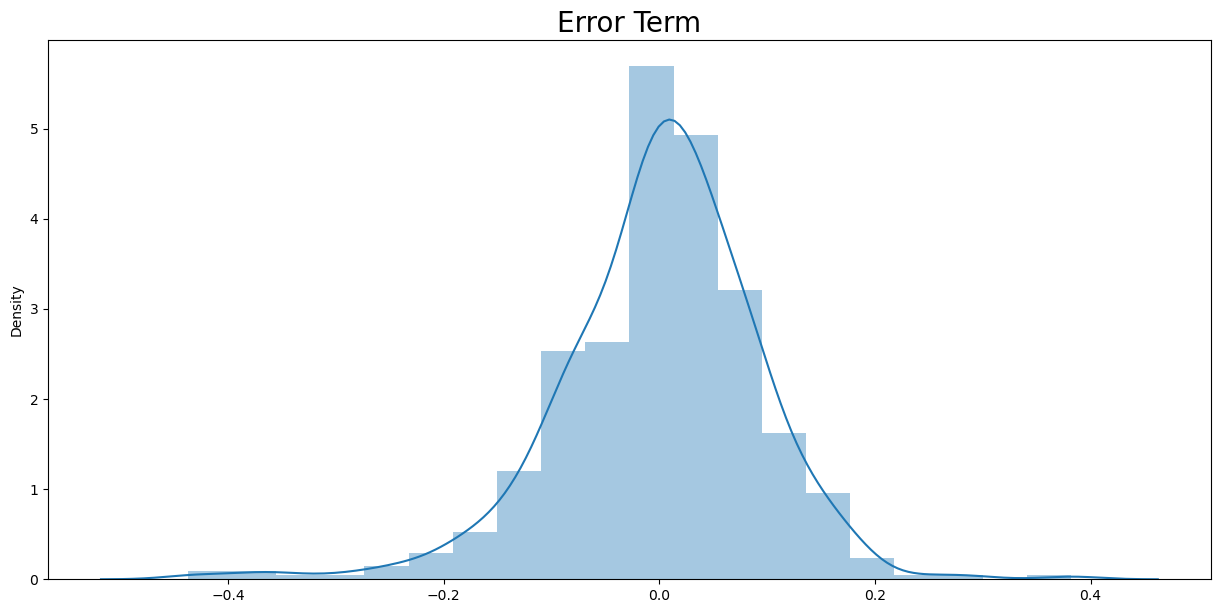

In [55]:
# Ploting Error term histogram
plt.figure(figsize=(15,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title("Error Term", fontdict={"fontsize": 20 })
plt.show()

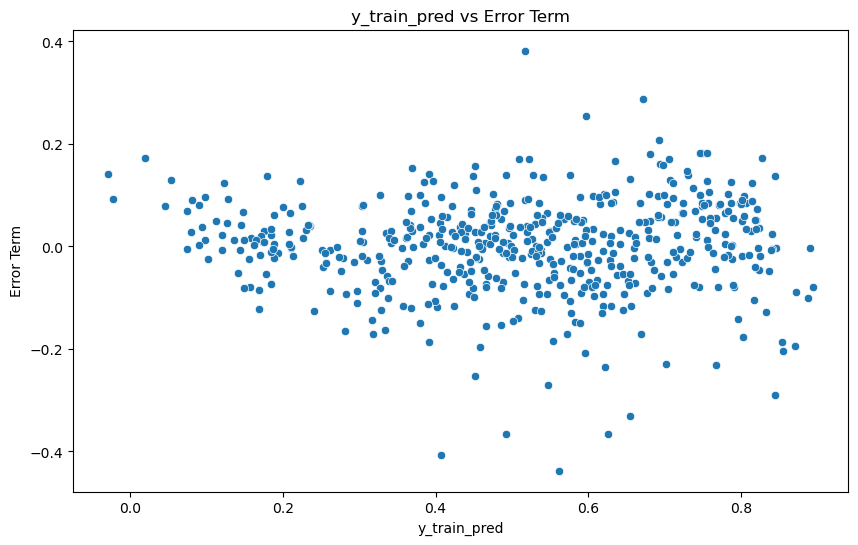

In [56]:
# Scatter plot between y_train_pred and error term
plt.figure(figsize=(10,6))
sns.scatterplot(x = y_train_pred, y = (y_train - y_train_pred))
plt.xlabel("y_train_pred")
plt.ylabel("Error Term")
plt.title("y_train_pred vs Error Term")
plt.show()

# Making Prediction Using Final Model

In [57]:
# Scaling the test dataset
num_var = ["temperature", "humidity", "windspeed", "count"]
boom_bike_test[num_var] = Scaler.transform(boom_bike_test[num_var])

In [58]:
# Statistical summary of test data
boom_bike_test.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,...,oct,sept,mon,sat,sun,thus,tue,wed,Light Snow,Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Defining X_test and y_test
y_test = boom_bike_test.pop("count")
X_test = boom_bike_test

In [60]:
# Selecting variables from X_test according to x_train final model dataset
variables = X_train_rfe.columns
X_test_3 = X_test[variables]

In [61]:
#Adding constant
X_test_lr_3 = sm.add_constant(X_test_3)

In [62]:
# Making Prediction using 3rd model
y_test_pred = lr_model_3.predict(X_test_lr_3)

# Model Evaluation

In [63]:
# Comparing r squared value of train and test dataset
print("R_squared_train_data:", r2_score(y_train,y_train_pred))
print("R_squared_test_data:", r2_score(y_test,y_test_pred))

R_squared_train_data: 0.8275786044596775
R_squared_test_data: 0.8124643723642359


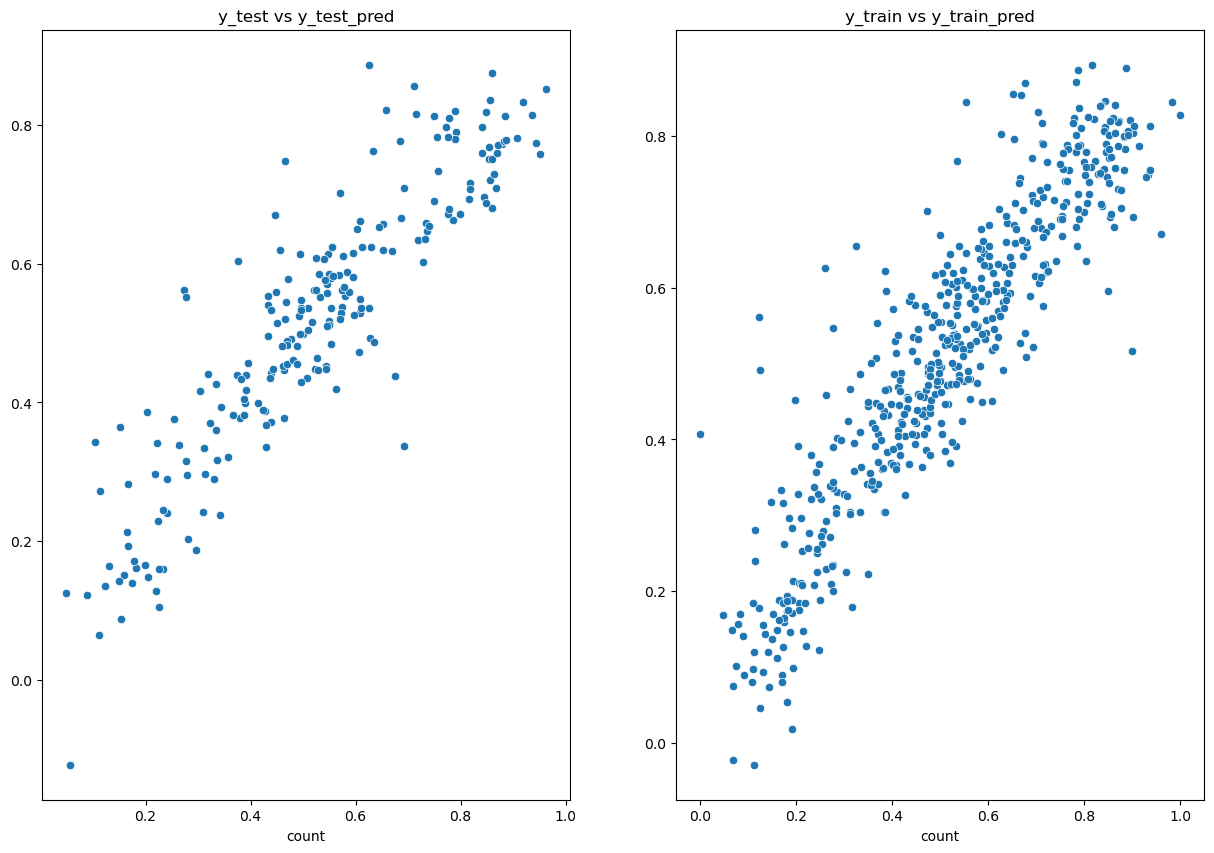

In [64]:
# To understand spread of the dataset
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot(x = y_test, y = y_test_pred)
plt.title("y_test vs y_test_pred")

plt.subplot(1,2,2)
sns.scatterplot(x = y_train, y = y_train_pred)
plt.title("y_train vs y_train_pred")
plt.show()

# Conclusion